In [10]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [11]:
df = pd.read_csv('../datasets/clean_churn.csv')
df = df.drop(columns= 'Unnamed: 0')
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
df.shape

(3333, 19)

In [13]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [14]:
df.describe(include=object)

,state
count,3333
unique,51
top,WV
freq,106


In [46]:
X = df.drop(columns='churn')
y = df.churn

In [47]:
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [48]:
X.shape

(3333, 18)

In [51]:
numerical_columns = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
                     'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
                     'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','customer_service_calls']

In [52]:
catcol = ['state','international plan','voice mail plan']

In [53]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

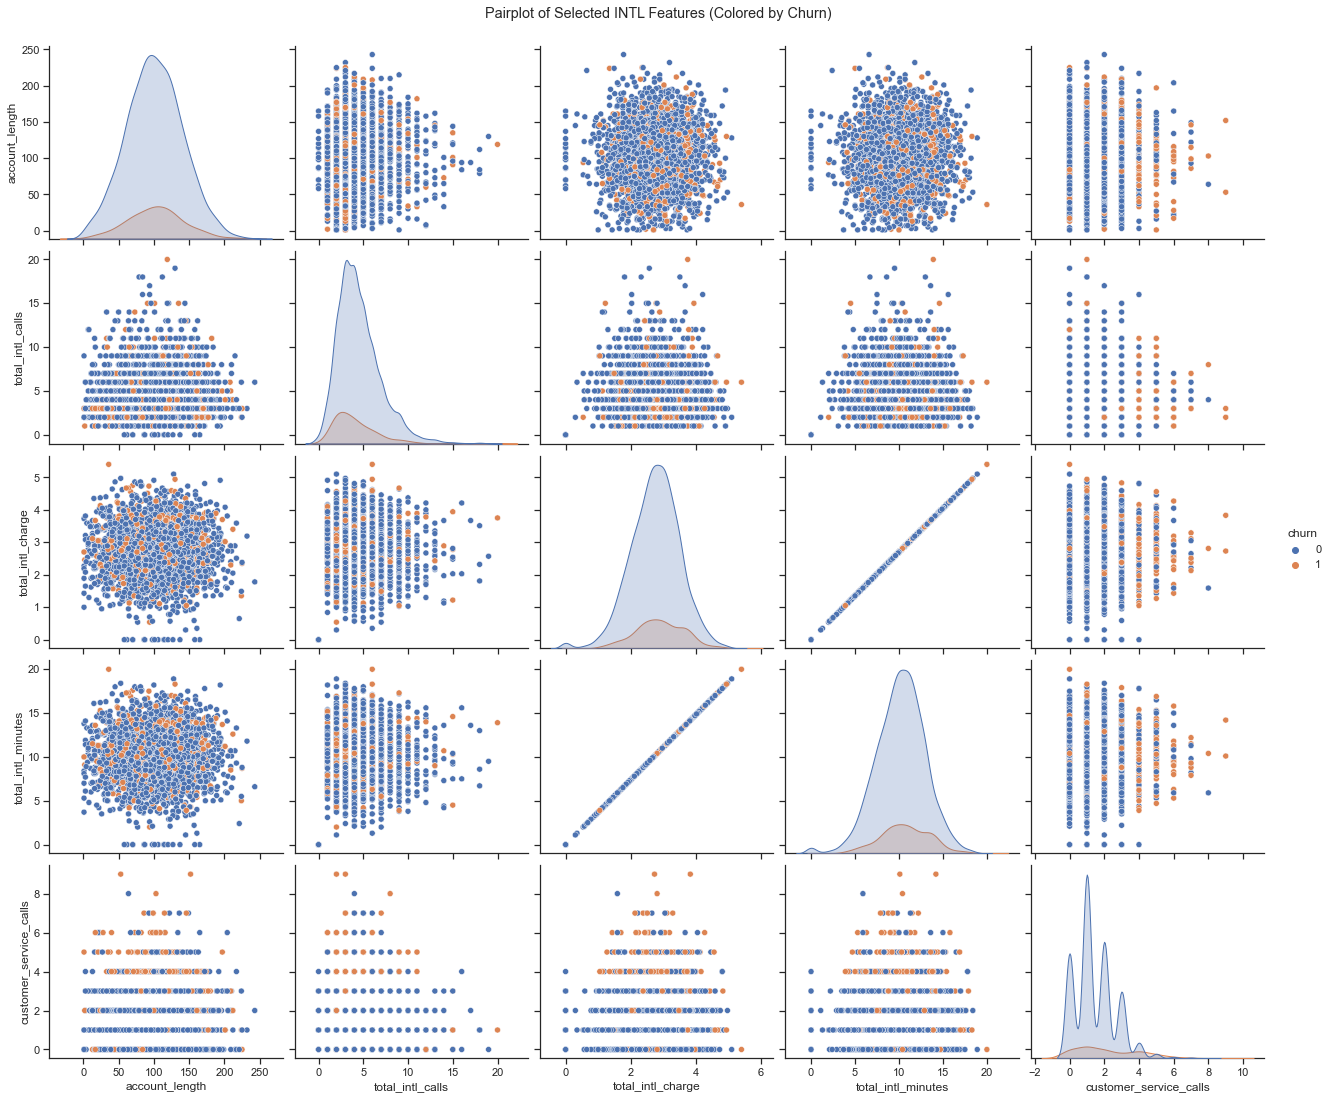

In [56]:
 #Select a subset of numerical features for plotting
selected_numerical_columns = ['account_length','total_intl_calls','total_intl_charge','total_intl_minutes','customer_service_calls']

# Set a larger plot size
sns.set(style="ticks")
sns.pairplot(df, vars=selected_numerical_columns, hue='churn', height=3, aspect=1.2, diag_kind='kde')
plt.suptitle("Pairplot of Selected INTL Features (Colored by Churn)", y=1.02)
plt.show()

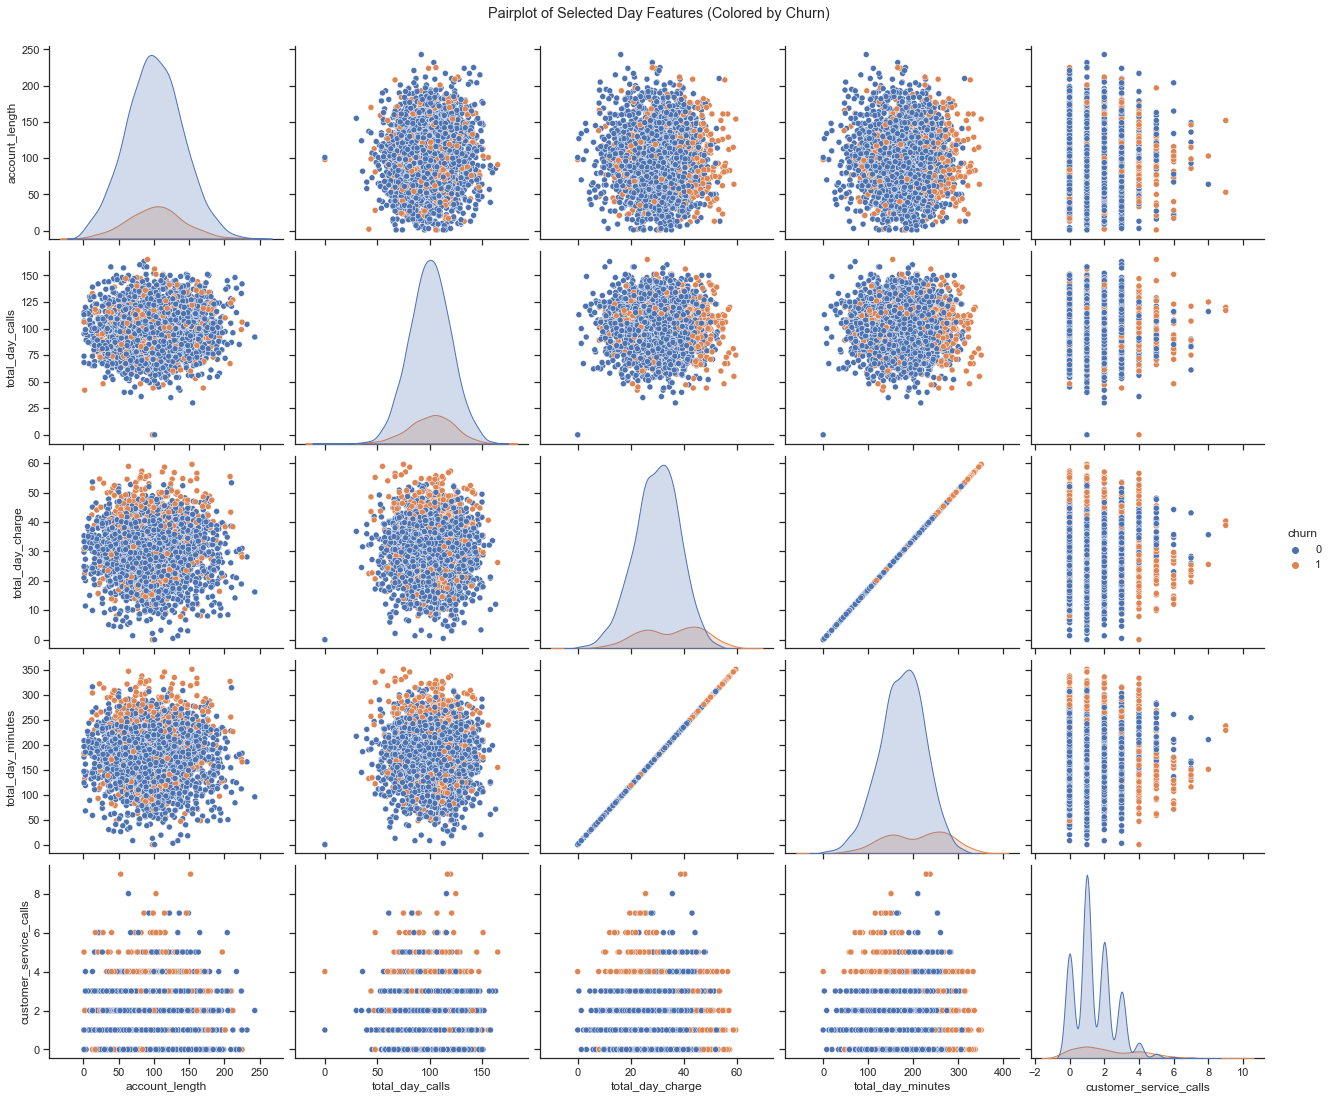

In [57]:
# Select a subset of numerical features for plotting
selected_numerical_columns = ['account_length','total_day_calls','total_day_charge','total_day_minutes','customer_service_calls']

# Set a larger plot size
sns.set(style="ticks")
sns.pairplot(df, vars=selected_numerical_columns, hue='churn', height=3, aspect=1.2, diag_kind='kde')
plt.suptitle("Pairplot of Selected Day Features (Colored by Churn)", y=1.02)
plt.show()

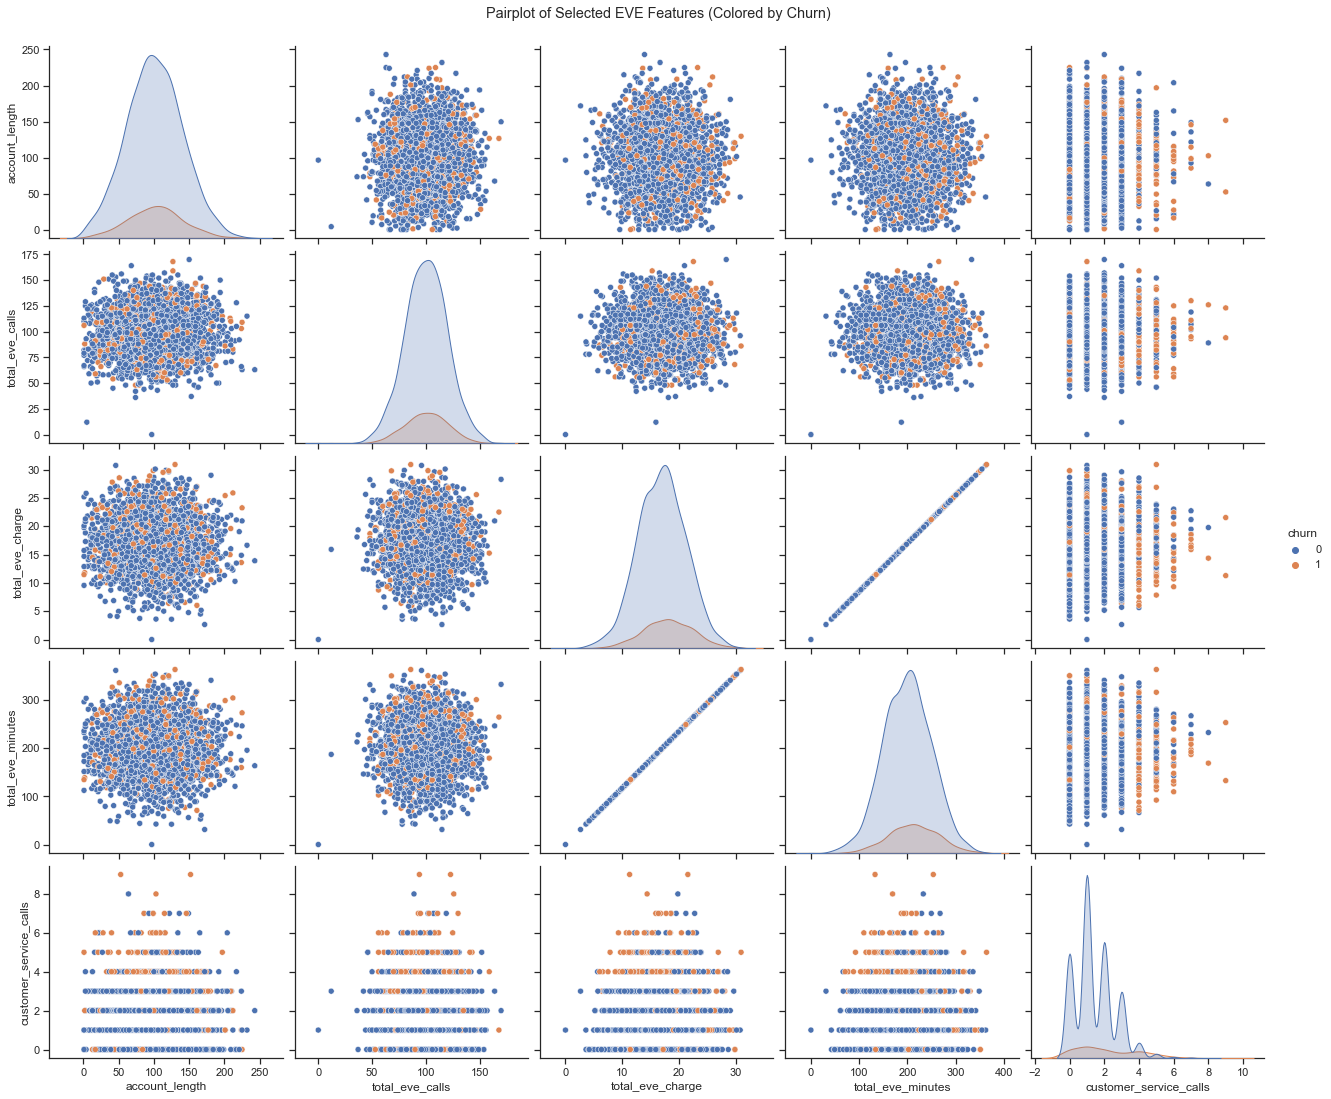

In [58]:
# Select a subset of numerical features for plotting
selected_numerical_columns = ['account_length','total_eve_calls','total_eve_charge','total_eve_minutes','customer_service_calls']

# Set a larger plot size
sns.set(style="ticks")
sns.pairplot(df, vars=selected_numerical_columns, hue='churn', height=3, aspect=1.2, diag_kind='kde')
plt.suptitle("Pairplot of Selected EVE Features (Colored by Churn)", y=1.02)
plt.show()

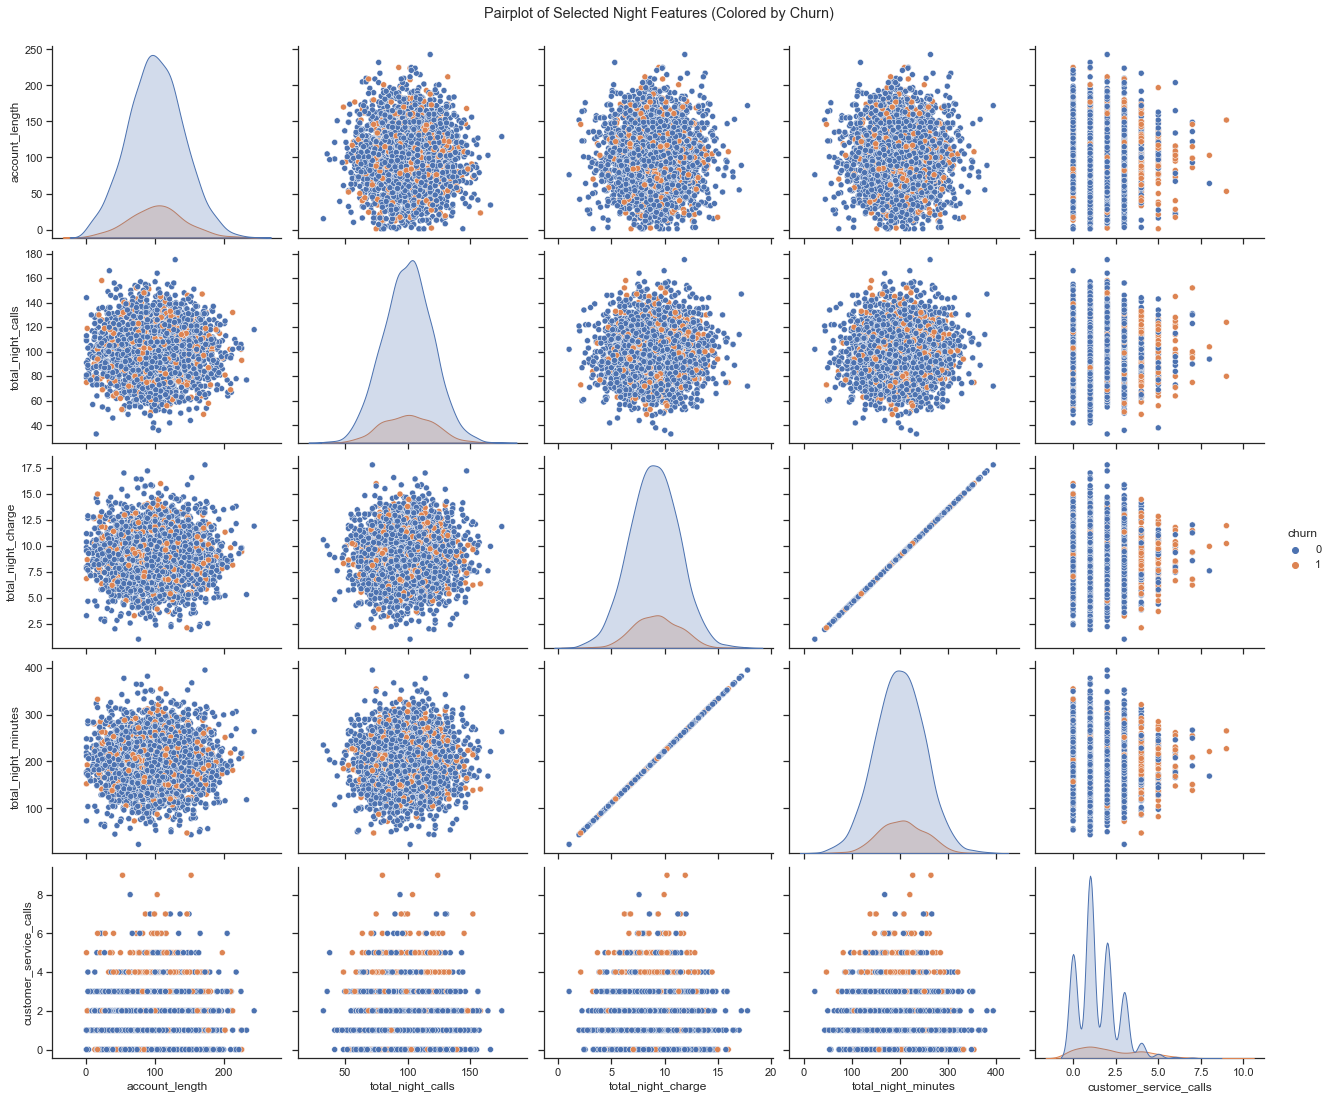

In [60]:
# Select a subset of numerical features for plotting
selected_numerical_columns = ['account_length','total_night_calls','total_night_charge','total_night_minutes','customer_service_calls']

# Set a larger plot size
sns.set(style="ticks")
sns.pairplot(df, vars=selected_numerical_columns, hue='churn', height=3, aspect=1.2, diag_kind='kde')
plt.suptitle("Pairplot of Selected Night Features (Colored by Churn)", y=1.02)
plt.show()

In [64]:
#sns.set(style="ticks")
#sns.pairplot(df, vars=numerical_columns, hue='churn', height=3, aspect=1.2, diag_kind='kde')
#plt.suptitle("Pairplot of Selected Night Features (Colored by Churn)", y=1.02)
#plt.show()

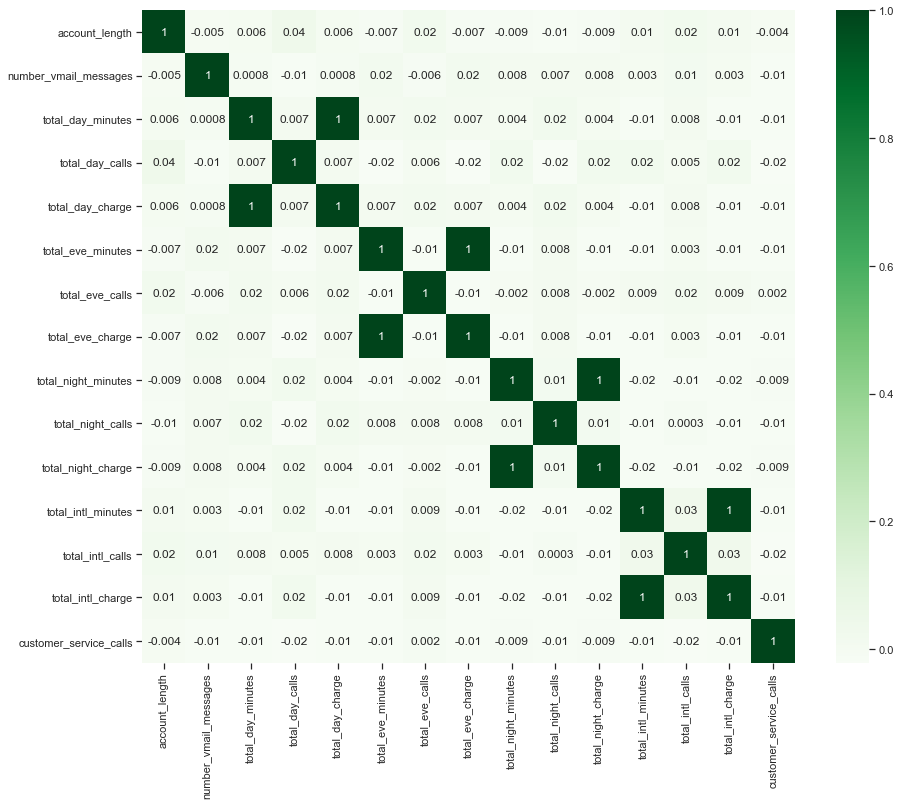

In [79]:
corr_mat = df[numerical_columns].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Greens', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [63]:
#numeric_df = df[numerical_columns]

In [38]:
#X = numeric_df.drop(columns=['customer_service_calls'])

In [39]:
#y = numeric_df.customer_service_calls

In [40]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [41]:
#dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [42]:
#dummy_model.score(X_test, y_test)

In [43]:
#dummy_model.score(X_train, y_train)

In [44]:
#y_train.value_counts(normalize=True)

In [45]:
#cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)

#cv_results

## @ @ @ For Logistic Regression, the model had an accuracy score of 0.70

